# Introduction to Clustering

## Unsupervised learning: basics

### Pokémon sightings

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

**Instructions**

* Import the pyplot class from matplotlib library as plt.
* Create a scatter plot using the pyplot class.
* Display the scatter plot created in the earlier step.

In [7]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt


In [ ]:

# Populate data

x= [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y= [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Pokémon sightings: hierarchical clustering

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

In [12]:
import seaborn as sns, pandas as pd

df=pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0


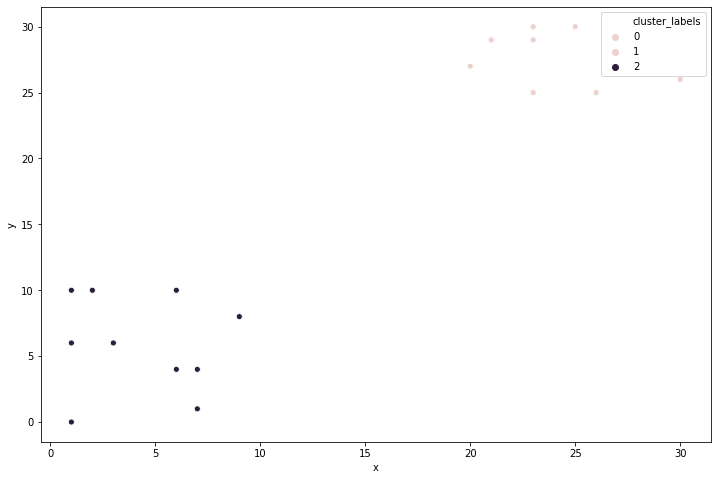

In [14]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')
fig=plt.figure(figsize=(12,8))
# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

Notice that the cluster labels are plotted with different colors. You will notice that the resulting plot has an extra cluster labelled 0 in the legend. This will be explained later in the course.

## Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings,

**Instructions**

* Import the kmeans and vq functions.
* Use the kmeans() function to compute cluster centers by defining two clusters.
* Assign cluster labels to each data point using vq() function.
* Plot the points with seaborn and assign a different color to each cluster

In [21]:
df['x']=df['x'].astype(float)
df['y']=df['y'].astype(float)

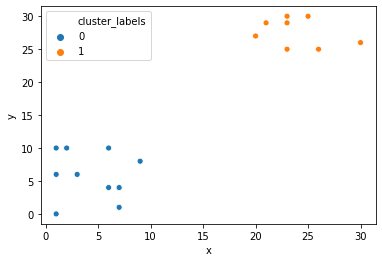

In [22]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

## Basics of cluster analysis

A cluster is a group of items with similar characteristics.

linkage and fcluster

linkage method computes distances between intermediate clusters. 

fcluster method generates clusters and assigns associated cluster labels to a new column in the dataframe.

**Lets visualize first**

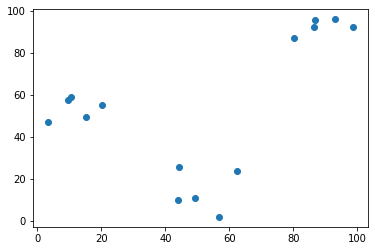

In [3]:
#from matplotlib import pyplot as plt
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]

y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
plt.scatter(x_coordinates, y_coordinates)
plt.show()

I can see 3 clusters, so indicate it in the fluster method.

In [4]:
#from scipy.cluster.hierarchy import linkage, fcluster
#from matplotlib import pyplot as plt
#import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
'y_coordinate': y_coordinates})
Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

df.head()

,x_coordinate,y_coordinate,cluster_labels
0,80.1,87.2,1
1,93.1,96.1,1
2,86.6,95.6,1
3,98.5,92.4,1
4,86.4,92.4,1


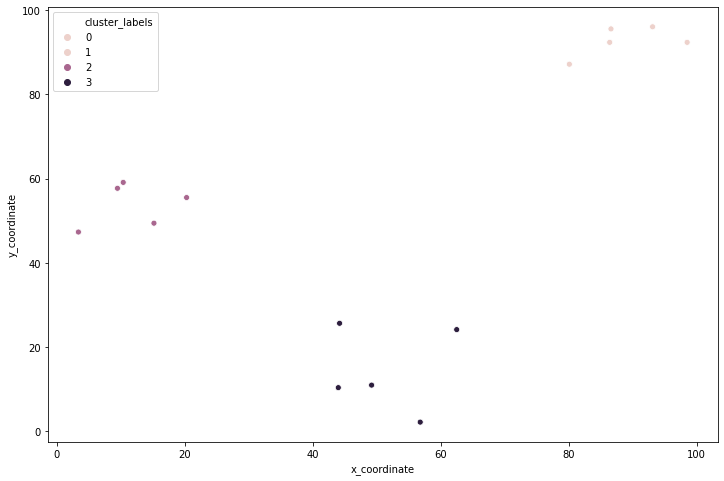

In [6]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)
plt.show()

For K-means clustering is implemented using methods kmeans and vq of scipy-dot-cluster-dot-vq. The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq.

The second argument in both methods is distortion, which we capture in a dummy variable

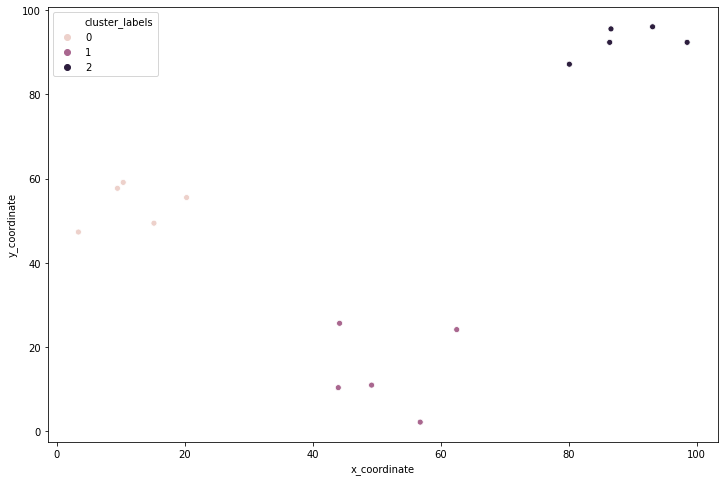

In [8]:
from scipy.cluster.vq import kmeans, vq
#from matplotlib import pyplot as plt
#import seaborn as sns, pandas as pd
import random
random.seed((1000,2000))

df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})
centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

fig=plt.figure(figsize=(12,8))
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)
plt.show()

## Data preparation for cluster analysis

**Normalization of data**

Normalization: process of rescaling data to a standard deviation of 1

$$x\_new=\frac {x}{std_dex(x)}$$

**Normalize basic list data**

Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

In [1]:
import numpy as np

In [2]:
goals_for = [4,3,2,3,1,1,2,0,1,4]
goals_for/np.std(goals_for)

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

In [3]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


In [6]:
print(f' unscaled {np.var(goals_for)} Scaled {np.var(scaled_data)}')

 unscaled 1.6900000000000002 Scaled 0.9999999999999998


Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.

### Visualize normalized data

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

**Instructions**

* Use the matplotlib library to plot the original and scaled data.
* Show the legend in the plot.
* Display the plot.

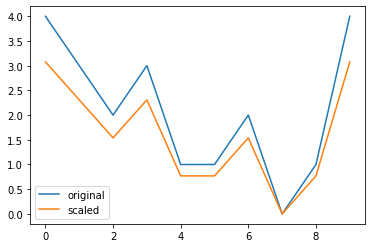

In [8]:

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

Notice the scaled values have lower variations in them.

### Normalization of small numbers

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

**Instructions**

* Scale the list rate_cuts, which contains the changes in interest rates.
* Plot the original data against the scaled data.

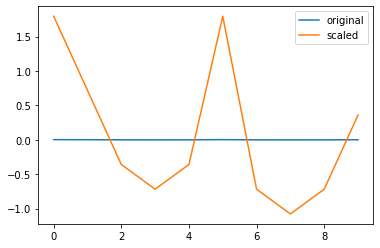

In [9]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

Notice how the changes in the original data are negligible as compared to the scaled data

### FIFA 18: Normalize data

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

In [10]:
import pandas as pd

In [13]:
# fifa_18_dataset.csv

fifa=pd.read_csv("fifa_18_sample_data.csv")

In [14]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [15]:
fifa[["eur_wage","eur_value"]].head()

,eur_wage,eur_value
0,565000.0,95500000.0
1,565000.0,105000000.0
2,280000.0,123000000.0
3,510000.0,97000000.0
4,230000.0,61000000.0


**Instructions**

* Scale the values of eur_wage and eur_value using the whiten() function.

In [18]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

**Instructions**

* Plot the scaled wages and transfer values of players using the .plot() method of Pandas.

In [22]:
fifa['scaled_wage'].shape

(1000,)

In [23]:
fifa['scaled_value'].shape

(1000,)

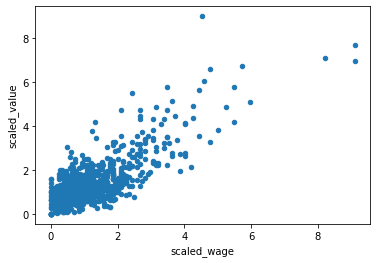

In [25]:
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

* Check the mean and standard deviation of the scaled data using the .describe() method of Pandas.

In [26]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


As you can see the scaled values have a standard deviation of 1.